# Swarm check in data

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import altair as alt
import requests
import json
import sqlite3

/Users/mhustiles/.local/share/virtualenvs/notebooks-xu8v5Vvv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
import altair as alt
import altair_latimes as lat

alt.themes.register("latimes", lat.theme)
alt.themes.enable("latimes")

ThemeRegistry.enable('latimes')

In [4]:
from datetime import datetime
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2021-07-26


In [5]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

---

### Get the data using this tool from [Swarm-to-SQLite](https://github.com/dogsheep/swarm-to-sqlite)

In [6]:
# !swarm-to-sqlite data/raw/checkins.db --token=UXTT2DWG0ZF01W4X4FZXAL2LYLQ5CLBKW5ZTEB3QJTKZAONN

### Read the sqlite database we downloaded

In [7]:
import sqlite3

# Create a SQL connection to our SQLite database
cnx = sqlite3.connect("data/raw/checkins.db")

### Create dataframes for various tables in the DB

In [8]:
venues = pd.read_sql_query("SELECT * FROM venues", cnx)
checkins = pd.read_sql_query("SELECT * FROM checkins", cnx)
categories = pd.read_sql_query("SELECT * FROM categories", cnx)
categories_venues = pd.read_sql_query("SELECT * FROM categories_venues", cnx)

In [9]:
checkins[checkins["venue"] == "5983aa0af0ca957f7ea9a7c3"]

,id,createdAt,type,timeZoneOffset,editableUntil,like,isMayor,source,venue,createdBy,event,sticker,created,comments_count,entities,shout,ratedAt,private,visibility
13,60f83eeb4e7f0265a7990410,1626881771,checkin,-420,NaN,0,0,1.0,5983aa0af0ca957f7ea9a7c3,None,None,None,2021-07-21T15:36:11,0,None,None,NaN,NaN,None


In [10]:
venues[venues["id"] == "5983aa0af0ca957f7ea9a7c3"]

,id,name,contact,verified,stats,beenHere,address,crossStreet,postalCode,cc,city,state,country,formattedAddress,latitude,longitude,url,hasMenu,delivery,menu,allowMenuUrlEdit,storeId,neighborhood,venueRatingBlacklisted,venuePage,closed,private,isFuzzed
2,5983aa0af0ca957f7ea9a7c3,Woodshop Studios,{},0,"{""tipCount"": 0, ""usersCount"": 18, ""checkinsCount"": 278}","{""lastCheckinExpiredAt"": 0}",10567 Jefferson Blvd,Jordan Way,90232,US,Culver City,CA,United States,"[""10567 Jefferson Blvd (Jordan Way)"", ""Culver City, CA 90232""]",34.005708,-118.393419,None,NaN,None,None,1.0,None,None,NaN,None,NaN,NaN,NaN


In [11]:
categories.head(1)

,id,name,pluralName,shortName,primary,icon_prefix,icon_suffix
0,56aa371be4b08b9a8d573523,Film Studio,Film Studios,Film Studio,1,https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_,.png


In [12]:
categories_venues[categories_venues["categories_id"] == "56aa371be4b08b9a8d573523"]

,categories_id,venues_id
2,56aa371be4b08b9a8d573523,5983aa0af0ca957f7ea9a7c3


### Merge categories and venues

In [13]:
category_lookup = pd.merge(
    categories_venues, categories, left_on="categories_id", right_on="id"
)

In [14]:
venue_lookup = pd.merge(categories_venues, venues, left_on="venues_id", right_on="id")

In [15]:
category_lookup

,categories_id,venues_id,id,name,pluralName,shortName,primary,icon_prefix,icon_suffix
0,52f2ab2ebcbc57f1066b8b42,4aea0673f964a52095b821e3,52f2ab2ebcbc57f1066b8b42,Big Box Store,Big Box Stores,Big Box Store,1,https://ss3.4sqi.net/img/categories_v2/shops/default_,.png
1,52f2ab2ebcbc57f1066b8b42,4a9087eff964a520601820e3,52f2ab2ebcbc57f1066b8b42,Big Box Store,Big Box Stores,Big Box Store,1,https://ss3.4sqi.net/img/categories_v2/shops/default_,.png
2,52f2ab2ebcbc57f1066b8b42,4b54ad34f964a52086c627e3,52f2ab2ebcbc57f1066b8b42,Big Box Store,Big Box Stores,Big Box Store,1,https://ss3.4sqi.net/img/categories_v2/shops/default_,.png
3,52f2ab2ebcbc57f1066b8b42,4a7efb27f964a52065f21fe3,52f2ab2ebcbc57f1066b8b42,Big Box Store,Big Box Stores,Big Box Store,1,https://ss3.4sqi.net/img/categories_v2/shops/default_,.png
4,52f2ab2ebcbc57f1066b8b42,4ba68266f964a5205e5939e3,52f2ab2ebcbc57f1066b8b42,Big Box Store,Big Box Stores,Big Box Store,1,https://ss3.4sqi.net/img/categories_v2/shops/default_,.png
...,...,...,...,...,...,...,...,...,...
1907,52af3b813cf9994f4e043c04,49f61fe9f964a520046c1fe3,52af3b813cf9994f4e043c04,Taiwanese Restaurant,Taiwanese Restaurants,Taiwanese,1,https://ss3.4sqi.net/img/categories_v2/food/asian_,.png
1908,52af3b813cf9994f4e043c04,4adf782cf964a520e07a21e3,52af3b813cf9994f4e043c04,Taiwanese Restaurant,Taiwanese Restaurants,Taiwanese,1,https://ss3.4sqi.net/img/categories_v2/food/asian_,.png
1909,52f2ab2ebcbc57f1066b8b4a,4bdeb11b6198c9b6aa7f14ff,52f2ab2ebcbc57f1066b8b4a,Tunnel,Tunnels,Tunnel,1,https://ss3.4sqi.net/img/categories_v2/travel/default_,.png
1910,4bf58dd8d48988d118941735,4a50231cf964a520ffaf1fe3,4bf58dd8d48988d118941735,Dive Bar,Dive Bars,Dive Bar,1,https://ss3.4sqi.net/img/categories_v2/nightlife/divebar_,.png


### Merge checkins and venues

In [16]:
src = pd.merge(checkins, venue_lookup, left_on="venue", right_on="id")

In [17]:
df = pd.merge(src, category_lookup, on="venues_id")

In [18]:
df.iloc[0]

id_x                                                                                                                                                                          60fd9b6c46109e0512b59bd2
createdAt                                                                                                                                                                                   1627233132
type                                                                                                                                                                                           checkin
timeZoneOffset                                                                                                                                                                                    -420
editableUntil                                                                                                                                                                          1627319532000.0
like 

In [19]:
df_slim = df[
    [
        "id_x",
        "timeZoneOffset",
        "isMayor",
        "created",
        "name_x",
        "address",
        "crossStreet",
        "postalCode",
        "cc",
        "city",
        "state",
        "country",
        "latitude",
        "longitude",
        "pluralName",
    ]
].copy()

In [20]:
df_slim.head()

,id_x,timeZoneOffset,isMayor,created,name_x,address,crossStreet,postalCode,cc,city,state,country,latitude,longitude,pluralName
0,60fd9b6c46109e0512b59bd2,-420,0,2021-07-25T17:12:12,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores
1,5e5ae1a28e7a900008d082d2,-480,0,2020-02-29T22:11:46,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores
2,5d3d071069a82a0008fb9ef1,-420,0,2019-07-28T02:23:12,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores
3,5c3a37f358002c002c3eccec,-480,0,2019-01-12T18:54:43,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores
4,5c265e438ad62e002c1f4cce,-480,0,2018-12-28T17:32:51,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores


### Dates

In [21]:
df_slim["date"] = pd.to_datetime(df_slim["created"], format="%Y-%m-%d")

In [22]:
df_slim["date"] = pd.to_datetime(df_slim["date"].dt.strftime("%Y-%m-%d"))

In [23]:
df_slim["year"] = df_slim["date"].dt.year.astype(str)
df_slim["quarter"] = df_slim["date"].dt.quarter.astype(str)
df_slim["day"] = df_slim["date"].dt.day.astype(str)
df_slim["month"] = df_slim["date"].dt.month.astype(str)
df_slim["weekday"] = df_slim["date"].dt.day_name()
df_slim["monthname"] = df_slim["date"].dt.month_name()
df_slim["monthday"] = df_slim["date"].dt.strftime("%m-%d")
df_slim["monthyear"] = df_slim["date"].dt.strftime("%m-%Y")

In [24]:
df_slim.head()

,id_x,timeZoneOffset,isMayor,created,name_x,address,crossStreet,postalCode,cc,city,state,country,latitude,longitude,pluralName,date,year,quarter,day,month,weekday,monthname,monthday,monthyear
0,60fd9b6c46109e0512b59bd2,-420,0,2021-07-25T17:12:12,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores,2021-07-25,2021,3,25,7,Sunday,July,07-25,07-2021
1,5e5ae1a28e7a900008d082d2,-480,0,2020-02-29T22:11:46,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores,2020-02-29,2020,1,29,2,Saturday,February,02-29,02-2020
2,5d3d071069a82a0008fb9ef1,-420,0,2019-07-28T02:23:12,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores,2019-07-28,2019,3,28,7,Sunday,July,07-28,07-2019
3,5c3a37f358002c002c3eccec,-480,0,2019-01-12T18:54:43,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores,2019-01-12,2019,1,12,1,Saturday,January,01-12,01-2019
4,5c265e438ad62e002c1f4cce,-480,0,2018-12-28T17:32:51,Target,10820 Jefferson Blvd,at Cota St,90230,US,Culver City,CA,United States,33.998959,-118.393326,Big Box Stores,2018-12-28,2018,4,28,12,Friday,December,12-28,12-2018


In [25]:
df_slim.columns = df_slim.columns.str.lower()

In [26]:
df_slim.rename(columns={"id_x": "checkinid", "name_x": "place"}, inplace=True)

In [27]:
df_slim.dtypes

checkinid                 object
timezoneoffset             int64
ismayor                    int64
created                   object
place                     object
address                   object
crossstreet               object
postalcode                object
cc                        object
city                      object
state                     object
country                   object
latitude                 float64
longitude                float64
pluralname                object
date              datetime64[ns]
year                      object
quarter                   object
day                       object
month                     object
weekday                   object
monthname                 object
monthday                  object
monthyear                 object
dtype: object

---

### Change over time

In [28]:
places_time_grouped = (
    df_slim.groupby(["year"]).agg({"checkinid": "count"}).reset_index()
)

In [29]:
places_time_grouped.rename(columns={"checkinid": "count"}, inplace=True)

In [30]:
places_time_grouped.head(20)

,year,count
0,2010,286
1,2011,538
2,2012,1131
3,2013,683
4,2014,293
5,2015,239
6,2016,419
7,2017,411
8,2018,407
9,2019,624


In [31]:
alt.Chart(places_time_grouped).mark_bar().encode(x="year", y="count").properties(
    width=600, height=400
)

alt.Chart(...)

### Make it a geodataframe

In [32]:
gdf = gpd.GeoDataFrame(
    df_slim, geometry=gpd.points_from_xy(df_slim.longitude, df_slim.latitude)
)

<AxesSubplot:>

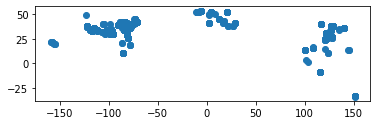

In [33]:
gdf.plot()

### Export

In [34]:
df.to_json("data/processed/checkins.json", orient="records", indent=4)

In [35]:
gdf.to_file("data/processed/geo_checkins.json", driver="GeoJSON")